<a href="https://colab.research.google.com/github/sonaliliyanahetti/Platform-Feasibility-and-Market-Analysist/blob/Model-training/feasibility_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [10]:
data=pd.read_csv('/content/drive/MyDrive/Intern /Model.csv')

In [11]:
data.head()

,Catergory,Username,Followers,Engagement Rate,Do they make money from Insta(),Affiliate Marketing,Subscription,Selling own merch,Offline sessions,Methods of offline sessions,Donation,Selling digital products,Brand Ambassordors,Sell courses,Online sessions,Methods of online sessions
0,Yoga and Fitness,yogiathlete,5078,0.04,Yes,No,Yes,Yes,Yes,Physical class,No,No,No,Yes,No,Non
1,Yoga and Fitness,ivoriejenkins,5468,0.05,Yes,Yes,No,No,No,Nan,No,No,No,No,Yes,Personal App
2,Yoga and Fitness,gracecairns,5773,0.05,Yes,No,Yes,Yes,No,Nan,No,No,No,Yes,Yes,MindBody
3,Yoga and Fitness,nikkie_rox,6038,0.04,No,No,No,No,No,Nan,No,No,No,No,No,Non
4,Yoga and Fitness,namaste.trey,6079,0.07,Yes,Yes,No,No,No,Nan,No,No,No,No,No,Non


In [13]:
X=data[['Catergory']]
Y=data[['Online sessions']] # independent variable (must be 2D)
                          # dependent variable (binary: 0 or 1)

In [15]:
#split data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
# 5. Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [20]:
# Convert 'Catergory' column to numerical using one-hot encoding
X = pd.get_dummies(data['Catergory'], prefix='Catergory')
Y = data['Online sessions'].apply(lambda x: 1 if x == 'Yes' else 0) # Convert 'Yes'/'No' to 1/0

# Split data again after encoding
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

print("Model training complete.")

Model training complete.


In [21]:
# 6. Predict on test data
Y_pred = model.predict(X_test)

In [23]:
# 7. Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9367088607594937
Confusion Matrix:
 [[74  0]
 [ 5  0]]


Accuracy: 0.9367088607594937

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        74
           1       0.00      0.00      0.00         5

    accuracy                           0.94        79
   macro avg       0.47      0.50      0.48        79
weighted avg       0.88      0.94      0.91        79



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


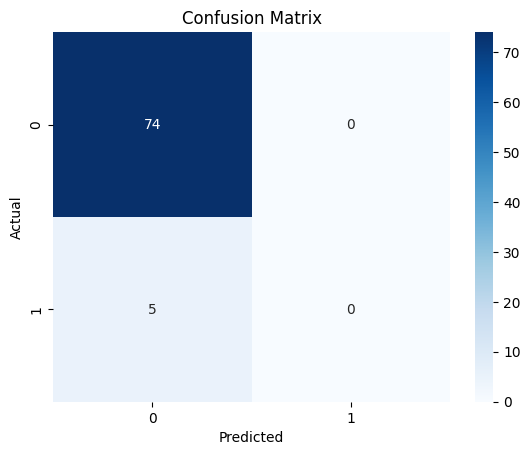

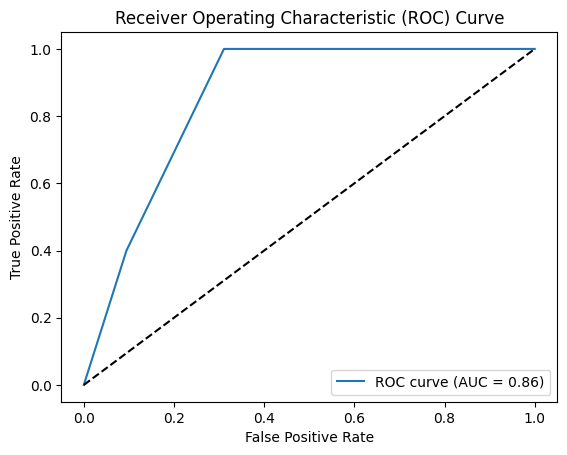

In [26]:
# -----------------------------------------------------------
# Model Training
# -----------------------------------------------------------
# Assuming you already trained your model as:
# model.fit(X_train, y_train)

# -----------------------------------------------------------
# Model Evaluation
# -----------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Predictions (probabilities and classes)
Y_pred_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1
Y_pred = model.predict(X_test)                   # predicted labels (0 or 1)

# Accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------------------------------------
# ROC Curve
# -----------------------------------------------------------
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
